In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv('train2.csv')
test=pd.read_csv('test2.csv')
sample=pd.read_csv('sample.csv')

In [473]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,39.0,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [ ]:
tr=train.drop(['id','trainee_id','test_id','trainee_id','program_id'],axis=1)

In [ ]:
te=test.drop(['id','trainee_id','test_id','trainee_id','program_id'],axis=1)

In [ ]:
tr.head()

In [ ]:
te.head()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['gender','is_pass']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs Sex')
sns.countplot('gender',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('Sex:pass vs fail')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['trainee_engagement_rating','is_pass']].groupby(['trainee_engagement_rating']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs trainee_engagement_rating')
sns.countplot('trainee_engagement_rating',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('trainee_engagement_rating:pass vs fail')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['city_tier','is_pass']].groupby(['city_tier']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs city_tier')
sns.countplot('city_tier',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('city_tier:pass vs fail')
plt.show()

In [ ]:
sns.factorplot('trainee_engagement_rating','is_pass',hue='gender',data=train)
plt.show()

In [ ]:
pd.crosstab(train.total_programs_enrolled,train.is_pass,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['total_programs_enrolled'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('total_programs_enrolled',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('pogram:Survived vs Dead')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['is_handicapped','is_pass']].groupby(['is_handicapped']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs is_handicapped')
sns.countplot('is_handicapped',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('is_handicapped:pass vs fail')
plt.show()

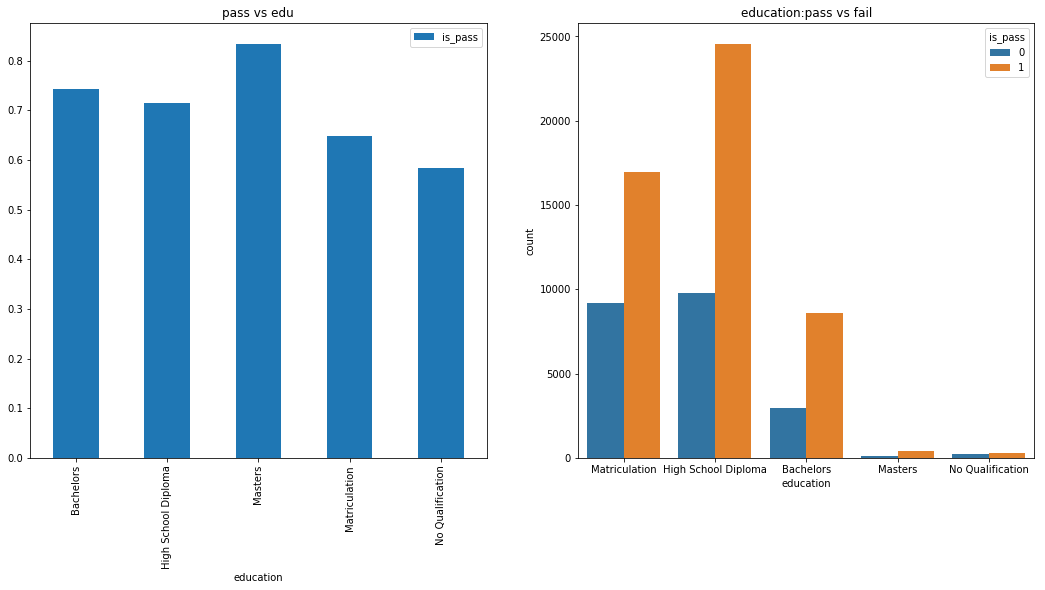

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['education','is_pass']].groupby(['education']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs edu')
sns.countplot('education',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('education:pass vs fail')
plt.show()

In [ ]:
train.head()

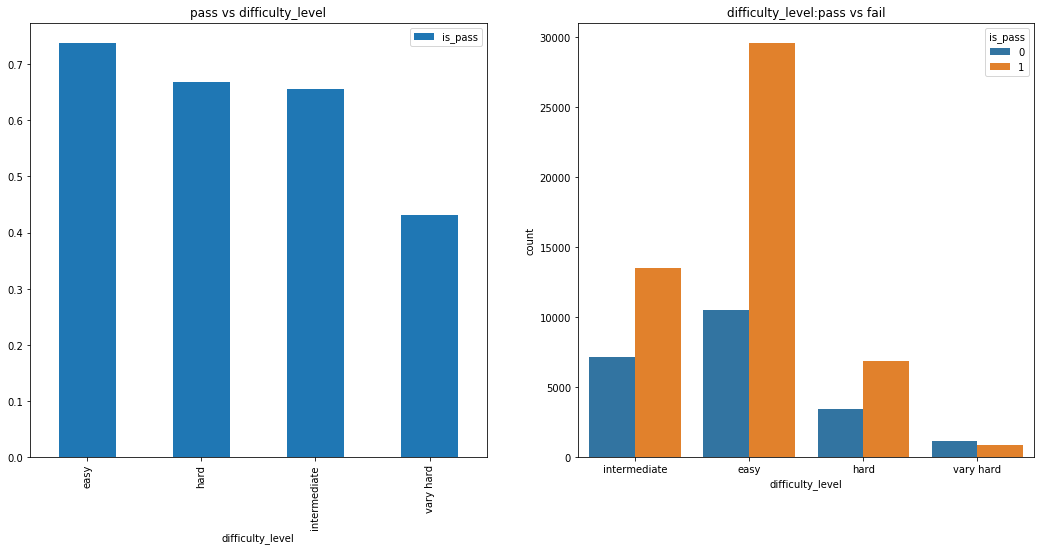

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['difficulty_level','is_pass']].groupby(['difficulty_level']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs difficulty_level')
sns.countplot('difficulty_level',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('difficulty_level:pass vs fail')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['test_type','is_pass']].groupby(['test_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs test_type')
sns.countplot('test_type',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('test_type:pass vs fail')
plt.show()

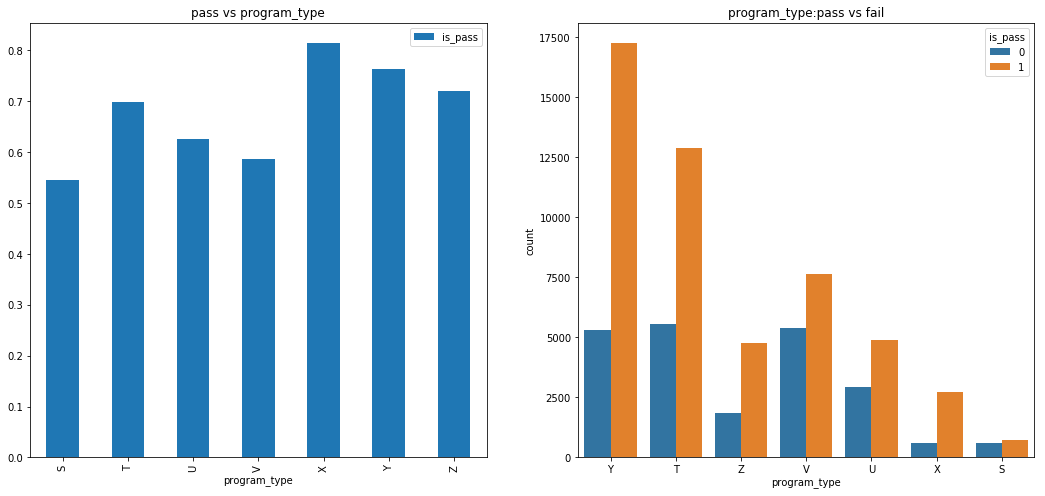

In [474]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['program_type','is_pass']].groupby(['program_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('pass vs program_type')
sns.countplot('program_type',hue='is_pass',data=train,ax=ax[1])
ax[1].set_title('program_type:pass vs fail')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['is_pass']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('is_pass= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['is_pass']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('is_pass= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [519]:
# X=tr.iloc[:,:-1].values
Y=train.iloc[:,-1].values

X=np.array(train[['test_type','difficulty_level','education', 'trainee_engagement_rating','program_duration' ,'city_tier','total_programs_enrolled','age','program_type','gender']])
test_X=np.array(test[['test_type','difficulty_level','education', 'trainee_engagement_rating','program_duration','city_tier','total_programs_enrolled','age','program_type','gender']])

In [520]:
X[:,-1][0]=='M'

True

In [521]:
#test_X High School Diploma Matriculation Bachelors Masters No Qualification



In [522]:
for i,j in enumerate(X[:,1]):
#     print(type(i))
        if j=='intermediate':
            X[:,1][i]=1
        elif j=='easy':
            X[:,1][i]=0
        elif j=='hard':
            X[:,1][i]=2
        elif j=='vary hard':
            X[:,1][i]=3
    
        
        

In [523]:
for i,j in enumerate(test_X[:,1]):
#     print(type(i))
        if j=='intermediate':
            test_X[:,1][i]=1
        elif j=='easy':
            test_X[:,1][i]=0
        elif j=='hard':
            test_X[:,1][i]=2
        elif j=='vary hard':
            test_X[:,1][i]=3

In [524]:
for i,j in enumerate(X[:,0]):
#     print(type(i))
        if j=='offline':
            X[:,0][i]=1
        elif j=='online':
            X[:,0][i]=0


In [525]:
for i,j in enumerate(test_X[:,0]):
#     print(type(i))
        if j=='offline':
            test_X[:,0][i]=1
        elif j=='online':
            test_X[:,0][i]=0


In [526]:
for i,j in enumerate(X[:,-1]):
#     print(type(i))
        if j=='M':
            X[:,-1][i]=1
        elif j=='F':
            X[:,-1][i]=0


In [527]:
for i,j in enumerate(test_X[:,-1]):
#     print(type(i))
        if j=='M':
            test_X[:,-1][i]=1
        elif j=='F':
            test_X[:,-1][i]=0


In [528]:
for i,j in enumerate(X[:,2]):
#     print(type(i))
        if j=='No Qualification':
            X[:,2][i]=0
        elif j=='Matriculation':
            X[:,2][i]=1
        elif j=='High School Diploma':
            X[:,2][i]=2
        elif j=='Bachelors':
            X[:,2][i]=3
        elif j=='Masters':
            X[:,2][i]=4    

In [529]:
for i,j in enumerate(X[:,-2]):
#     print(type(i))
        if j=='S':
            X[:,-2][i]=0
        elif j=='T':
            X[:,-2][i]=1
        elif j=='U':
            X[:,-2][i]=2
        elif j=='V':
            X[:,-2][i]=3
        elif j=='W':
            X[:,-2][i]=4    
        elif j=='X':
            X[:,-2][i]=5 
        elif j=='Y':
            X[:,-2][i]=6 
        elif j=='Z':
            X[:,-2][i]=7         

In [530]:
for i,j in enumerate(test_X[:,-2]):
#     print(type(i))
        if j=='S':
            test_X[:,-2][i]=0
        elif j=='T':
            test_X[:,-2][i]=1
        elif j=='U':
            test_X[:,-2][i]=2
        elif j=='V':
            test_X[:,-2][i]=3
        elif j=='W':
            test_X[:,-2][i]=4    
        elif j=='X':
            test_X[:,-2][i]=5 
        elif j=='Y':
            test_X[:,-2][i]=6 
        elif j=='Z':
            test_X[:,-2][i]=7         

In [531]:
for i,j in enumerate(test_X[:,2]):
#     print(type(i))
        if j=='No Qualification':
            test_X[:,2][i]=0
        elif j=='Matriculation':
            test_X[:,2][i]=1
        elif j=='High School Diploma':
            test_X[:,2][i]=2
        elif j=='Bachelors':
            test_X[:,2][i]=3
        elif j=='Masters':
            test_X[:,2][i]=4    

In [532]:
test_X.shape

(31349, 10)

In [533]:
engage=X[:,3]
engage=engage.reshape(-1,1)
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(engage)
engage = imputer.transform(engage)

In [534]:
engage1=test_X[:,3]
engage1=engage1.reshape(-1,1)
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(engage1)
engage1 = imputer.transform(engage1)

In [535]:
test_X[:,3]=engage1.reshape(1,-1)

In [536]:
train.age=age

In [537]:
X[:,3]=engage.reshape(1,-1)

In [538]:
X[:,7]

array([24.0, 26.0, 40.0, ..., 39.0, 27.0, 31.0], dtype=object)

In [539]:
age=X[:,7]
age=age.reshape(-1,1)
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(age)
age = imputer.transform(age)

In [540]:
age1=test_X[:,7]
age1=age1.reshape(-1,1)
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(age1)
age1 = imputer.transform(age1)

In [541]:
X[:,7]=age.reshape(1,-1)

In [542]:
test_X[:,7]=age1.reshape(1,-1)
X

array([[1, 1, 1, ..., 24.0, 6, 1],
       [1, 0, 2, ..., 26.0, 1, 0],
       [0, 0, 1, ..., 40.0, 7, 1],
       ...,
       [0, 0, 1, ..., 39.0, 6, 1],
       [1, 1, 2, ..., 27.0, 3, 1],
       [0, 0, 2, ..., 31.0, 6, 0]], dtype=object)

In [543]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# #Encodes the Categorical values into numerical values
# X[:,0] = labelencoder_X.fit_transform(X[:,0])
# X[:,2] = labelencoder_X.fit_transform(X[:,2])
# X[:,1] = labelencoder_X.fit_transform(X[:,1])#selecting the column 
# # X[:,4] = labelencoder_X.fit_transform(X[:,4])#selecting the column 
# # X[:,5] = labelencoder_X.fit_transform(X[:,5])#selecting the column 


In [544]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# #Encodes the Categorical values into numerical values
# test_X[:,0] = labelencoder_X.fit_transform(test_X[:,0])
# test_X[:,2] = labelencoder_X.fit_transform(test_X[:,2])
# test_X[:,1] = labelencoder_X.fit_transform(test_X[:,1])#selecting the column 
# # test_X[:,4] = labelencoder_X.fit_transform(test_X[:,4])#selecting the column 
# # test_X[:,5] = labelencoder_X.fit_transform(test_X[:,5])#selecting the column 
# # test_X[:,9] = labelencoder_X.fit_transform(test_X[:,9])#selecting the column 


In [545]:
# X[:,9] = labelencoder_X.fit_transform(X[:,9])#selecting the column 


In [546]:
test_X

array([[1, 1, 1, ..., 46.0, 1, 0],
       [0, 0, 3, ..., 36.44089375191737, 6, 1],
       [0, 0, 1, ..., 36.44089375191737, 6, 1],
       ...,
       [0, 0, 3, ..., 36.44089375191737, 6, 1],
       [1, 0, 1, ..., 36.44089375191737, 7, 0],
       [1, 2, 1, ..., 26.0, 5, 1]], dtype=object)

In [547]:
X

array([[1, 1, 1, ..., 24.0, 6, 1],
       [1, 0, 2, ..., 26.0, 1, 0],
       [0, 0, 1, ..., 40.0, 7, 1],
       ...,
       [0, 0, 1, ..., 39.0, 6, 1],
       [1, 1, 2, ..., 27.0, 3, 1],
       [0, 0, 2, ..., 31.0, 6, 0]], dtype=object)

In [548]:
# onehotencoder = OneHotEncoder(categorical_features= [0,1,2])#onehot encoder
# X= onehotencoder.fit_transform(X).toarray()

In [549]:
# onehotencoder = OneHotEncoder(categorical_features= [0,1,2])#onehot encoder
# test_X= onehotencoder.fit_transform(test_X).toarray()

In [550]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler() 
# X = sc_X.fit_transform(X)
# test_X = sc_X.transform(test_X)

In [551]:
X.shape

(73147, 10)

In [552]:
test_X.shape

(31349, 10)

In [553]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [554]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te=train_test_split(X,Y,test_size=0.2)

In [ ]:
from xgboost import XGBClassifier
clf2=XGBClassifier()
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X,Y)
clf2.fit(x_tr,y_tr)

In [556]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(clf, open(filename, 'wb'))

In [557]:
# loaded_model = pickle.load(open(filename, 'rb'))

In [558]:
# filename = 'finalized_model.sav'
# pickle.dump(loaded_model, open(filename, 'wb'))

In [559]:
# loade = pickle.load(open(filename, 'rb'))

In [560]:
clf.score(x_tr,y_tr)

0.8597672471247672

In [561]:
sample.head()

,id,is_pass
0,1626_45,1
1,11020_130,1
2,12652_146,1
3,7038_72,0
4,888_71,1


In [562]:
ypred=clf.predict(test_X)

In [563]:
sample['is_pass']=ypred

In [564]:
sample.to_csv('anally.csv', sep=',',index=False)

In [565]:
sample.shape

(31349, 2)